In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
import csv
import math
import scipy.stats as st

from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

In [2]:
history = pd.read_csv(r"C:\Users\bangy\Documents\GitHub\Quant\data\HS300_history.csv")
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chang_date  900 non-null    object
 1   code        900 non-null    int64 
 2   in_out      900 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.2+ KB


In [3]:
date = history['chang_date'].tolist()
code = history['code'].tolist()
in_out = history['in_out'].tolist()

formatted_numbers = []
for num in code:
    num_str = str(num)  # Convert the number to a string
    prefix_zeros = '0' * (6 - len(num_str))  # Calculate the number of prefix zeros needed
    
    if num_str[0] == '6' and len(prefix_zeros) == 0:
        formatted_numbers.append('sh.' + prefix_zeros + num_str)
    else:
        formatted_numbers.append('sz.' + prefix_zeros + num_str)

code = formatted_numbers

for days in range(len(date)):
    date_str = date[days].strip()
    year, month, day = date_str.split('/')
    month = month.zfill(2)
    day = day.zfill(2)
    date[days] = f"{year}-{month}-{day}"

In [4]:
change_date = []
change_date.append(date[0])
take_in = []
drop_out = []
temp_in = []
temp_out = []

for days in range(len(date)):
    if date[days] != change_date[-1]:
        change_date.append(date[days])
        take_in.append(temp_in)
        drop_out.append(temp_out)
        temp_in = []
        temp_out = []
    
    if in_out[days] == "takein":
        temp_in.append(code[days])
    if in_out[days] == 'dropout':
        temp_out.append(code[days])
take_in.append(temp_in)
drop_out.append(temp_out)

In [5]:
hs = ['sh.600000', 'sh.600009', 'sh.600010', 'sh.600011', 'sh.600015', 'sh.600016', 'sh.600018', 'sh.600019', 'sh.600025', 'sh.600028', 'sh.600029', 'sh.600030', 'sh.600031', 'sh.600036', 'sh.600039', 'sh.600048', 'sh.600050', 'sh.600061', 'sh.600085', 'sh.600089', 'sh.600104', 'sh.600111', 'sh.600115', 'sh.600132', 'sh.600150', 'sh.600176', 'sh.600183', 'sh.600188', 'sh.600196', 'sh.600219', 'sh.600233', 'sh.600276', 'sh.600309', 'sh.600332', 'sh.600346', 'sh.600362', 'sh.600383', 'sh.600406', 'sh.600426', 'sh.600436', 'sh.600438', 'sh.600460', 'sh.600519', 'sh.600547', 'sh.600570', 'sh.600584', 'sh.600585', 'sh.600588', 'sh.600600', 'sh.600606', 'sh.600660', 'sh.600674', 'sh.600690', 'sh.600741', 'sh.600745', 'sh.600760', 'sh.600763', 'sh.600795', 'sh.600803', 'sh.600809', 'sh.600837', 'sh.600845', 'sh.600884', 'sh.600886', 'sh.600887', 'sh.600893', 'sh.600900', 'sh.600905', 'sh.600918', 'sh.600919', 'sh.600926', 'sh.600941', 'sh.600958', 'sh.600989', 'sh.600999', 'sh.601006', 'sh.601009', 'sh.601012', 'sh.601021', 'sh.601066', 'sh.601088', 'sh.601100', 'sh.601111', 'sh.601117', 'sh.601138', 'sh.601155', 'sh.601166', 'sh.601169', 'sh.601186', 'sh.601211', 'sh.601216', 'sh.601225', 'sh.601229', 'sh.601236', 'sh.601238', 'sh.601288', 'sh.601318', 'sh.601319', 'sh.601328', 'sh.601336', 'sh.601360', 'sh.601377', 'sh.601390', 'sh.601398', 'sh.601600', 'sh.601601', 'sh.601615', 'sh.601618', 'sh.601628', 'sh.601633', 'sh.601658', 'sh.601668', 'sh.601669', 'sh.601688', 'sh.601689', 'sh.601698', 'sh.601728', 'sh.601766', 'sh.601788', 'sh.601799', 'sh.601800', 'sh.601808', 'sh.601816', 'sh.601818', 'sh.601838', 'sh.601857', 'sh.601865', 'sh.601868', 'sh.601877', 'sh.601878', 'sh.601881', 'sh.601888', 'sh.601898', 'sh.601899', 'sh.601901', 'sh.601919', 'sh.601939', 'sh.601966', 'sh.601985', 'sh.601988', 'sh.601989', 'sh.601995', 'sh.601998', 'sh.603019', 'sh.603185', 'sh.603195', 'sh.603259', 'sh.603260', 'sh.603288', 'sh.603290', 'sh.603369', 'sh.603392', 'sh.603486', 'sh.603501', 'sh.603659', 'sh.603799', 'sh.603806', 'sh.603833', 'sh.603882', 'sh.603899', 'sh.603986', 'sh.603993', 'sh.605117', 'sh.605499', 'sh.688005', 'sh.688008', 'sh.688012', 'sh.688036', 'sh.688065', 'sh.688111', 'sh.688126', 'sh.688169', 'sh.688187', 'sh.688303', 'sh.688363', 'sh.688396', 'sh.688561', 'sh.688599', 'sh.688981', 'sz.000001', 'sz.000002', 'sz.000063', 'sz.000069', 'sz.000100', 'sz.000157', 'sz.000166', 'sz.000301', 'sz.000333', 'sz.000338', 'sz.000408', 'sz.000425', 'sz.000538', 'sz.000568', 'sz.000596', 'sz.000625', 'sz.000651', 'sz.000661', 'sz.000708', 'sz.000723', 'sz.000725', 'sz.000733', 'sz.000768', 'sz.000776', 'sz.000786', 'sz.000792', 'sz.000800', 'sz.000858', 'sz.000876', 'sz.000877', 'sz.000895', 'sz.000938', 'sz.000963', 'sz.000977', 'sz.001289', 'sz.001979', 'sz.002001', 'sz.002007', 'sz.002008', 'sz.002027', 'sz.002032', 'sz.002049', 'sz.002050', 'sz.002064', 'sz.002074', 'sz.002120', 'sz.002129', 'sz.002142', 'sz.002179', 'sz.002180', 'sz.002202', 'sz.002230', 'sz.002236', 'sz.002241', 'sz.002252', 'sz.002271', 'sz.002304', 'sz.002311', 'sz.002352', 'sz.002371', 'sz.002410', 'sz.002414', 'sz.002415', 'sz.002459', 'sz.002460', 'sz.002466', 'sz.002475', 'sz.002493', 'sz.002555', 'sz.002594', 'sz.002600', 'sz.002601', 'sz.002602', 'sz.002648', 'sz.002709', 'sz.002714', 'sz.002736', 'sz.002756', 'sz.002812', 'sz.002821', 'sz.002841', 'sz.002916', 'sz.002920', 'sz.002938', 'sz.003816', 'sz.300014', 'sz.300015', 'sz.300033', 'sz.300059', 'sz.300122', 'sz.300124', 'sz.300142', 'sz.300207', 'sz.300223', 'sz.300274', 'sz.300316', 'sz.300347', 'sz.300408', 'sz.300413', 'sz.300433', 'sz.300450', 'sz.300454', 'sz.300496', 'sz.300498', 'sz.300529', 'sz.300595', 'sz.300601', 'sz.300628', 'sz.300661', 'sz.300750', 'sz.300751', 'sz.300759', 'sz.300760', 'sz.300763', 'sz.300769', 'sz.300782', 'sz.300896', 'sz.300919', 'sz.300957', 'sz.300979', 'sz.300999']
stock_pool = [hs]

for days in range(len(change_date)-1, -1, -1):
    temp_stock = []
    temp_stock = list(stock_pool[-1])
    for stocks in take_in[days]:
        temp_stock.remove(stocks)
    for stocks in drop_out[days]:
        temp_stock.append(stocks)
    stock_pool.append(list(temp_stock))
stock_pool.reverse()

start_dates = []
end_dates = []

start_dates.append('2013-07-01')
for days in range(len(change_date)):
    start_dates.append(change_date[days])
    end_dates.append(change_date[days])
end_dates.append('2023-06-09')

In [6]:
df = pd.read_csv(r"C:\Users\bangy\Documents\GitHub\Quant\data\stock_code\stock_data_sh.600000.csv")
date = df['date'].tolist()
week = date[253:2675][::5]
week = week[:-1]

In [ ]:
df = pd.read_csv(r"C:\Users\bangy\Documents\GitHub\Quant\data\profit_data.csv")
repeated_code = df['code'].tolist()
publish = df['statDate'].tolist()
roe = df['roeAvg'].tolist()

In [ ]:
folder_path = r"C:\Users\bangy\Documents\GitHub\Quant\data\stock_code"
factor_matrix = []
return_matrix = []
code = []

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path)

    code.append(df['code'].tolist()[0])
    date = df['date'].tolist()
    closed_price = df['close'].tolist()
    tradestatus = df['tradestatus'].tolist()
    
    factor_list = []
    return_list = []
    mark = 0

    for i in range(240, len(date)-5):
        # tradestatus = 0 ==> stock suspended from trading
        # pbmrq = nan ==> finanicial report announced
        if date[i] not in week or tradestatus[i] == 0 or tradestatus[i+5] == 0:
            i = i + 1
        else:
            factor = 0
            return_rate = 0
            pos = week.index(date[i])
            for j in range(mark, len(repeated_code)):
                if repeated_code[j] == code[-1]:
                    if date[i] >= publish[j] and (j == len(repeated_code)-1 or date[i] < publish[j+1] or repeated_code[j+1] != repeated_code[j]):
                        if not math.isnan(roe[j]):
                            factor = roe[j]
                            return_rate = closed_price[i+5] / closed_price[i] - 1
                            mark = j
                            break
                        else:
                            factor = -100
                            return_rate = -100
                            break

            for _ in range(pos - len(factor_list)):
                factor_list.append(-100)
                return_list.append(-100)

            factor_list.append(factor)
            return_list.append(return_rate)
        
    for _ in range(len(factor_list), 484):
        factor_list.append(-100)
        return_list.append(-100)

    factor_matrix.append(factor_list)
    return_matrix.append(return_list)

In [7]:
folder_path = r"C:\Users\bangy\Documents\GitHub\Quant\data\stock_code"
factor_matrix = []
return_matrix = []
code = []

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path)

    code.append(df['code'].tolist()[0])
    date = df['date'].tolist()
    closed_price = df['close'].tolist()
    tradestatus = df['tradestatus'].tolist()
    turn = df['turn'].tolist()
    volume = df['volume'].tolist()
    
    factor_list = []


    for i in range(5, len(date)-5):
        
        # tradestatus = 0 ==> stock suspended from trading
        # pbmrq = nan ==> finanicial report announced
        if date[i] not in week or tradestatus[i] == 0 or tradestatus[i+5] == 0:
            i = i + 1
        else:
            pos = week.index(date[i])
            factor = closed_price[i] / closed_price[i-5] -1

            for _ in range(pos - len(factor_list)):
                factor_list.append(-100)
            
            factor_list.append(factor)

        
    for _ in range(len(factor_list), 484):
        factor_list.append(-100)


    factor_matrix.append(factor_list)


In [8]:
folder_path = r"C:\Users\bangy\Documents\GitHub\Quant\data\stock_code"
return_matrix = []

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path)

    return_list = []

    date = df['date'].tolist()
    closed_price = df['close'].tolist()
    tradestatus = df['tradestatus'].tolist()
    
    for i in range(5, len(date)-5):
        if date[i] not in week or tradestatus[i] == 0 or tradestatus[i+5] == 0:
            i = i + 1
        else:
            pos = week.index(date[i])
            return_rate = closed_price[i+5] / closed_price[i] - 1
            for _ in range(pos - len(return_list)):
                return_list.append(-100)
            
            return_list.append(return_rate)
        
    for _ in range(len(return_list), 484):
        return_list.append(-100)

    return_matrix.append(return_list)

In [9]:
period = 0
weeks = 0
while weeks < len(week):
    if week[weeks] >= end_dates[period]:
        period = period + 1
        continue
    if week[weeks] < start_dates[period]:
        weeks = weeks + 1
        continue
    for i in range(len(code)):
        if code[i] not in stock_pool[period]:
            factor_matrix[i][weeks] = -100
            return_matrix[i][weeks] = -100
    weeks = weeks + 1

In [ ]:
ic_list = []
for j in range(len(factor_matrix[0])):
    factor_list = []
    return_list = []
    delete_elements = []
    for i in range(len(factor_matrix)):
        if  return_matrix[i][j] != -100:
            factor_list.append(factor_matrix[i][j])
            return_list.append(return_matrix[i][j])
    
    mean = np.mean(factor_list)
    std = np.std(factor_list)
    for k in range(len(factor_list)):
        if factor_list[k] - mean > 3 * std:
            factor_list[k] = mean + 3 * std
        if factor_list[k] - mean < - 3 * std:
            factor_list[k] = mean - 3 * std
        factor_list[k] = (factor_list[k] - mean) / std
    ic_list.append(st.spearmanr(factor_list, return_list).correlation)

average_ic = np.mean(ic_list)

# Calculate IR
ir = np.mean(ic_list) / np.std(ic_list)

# Print average IC for each day and IR
print('Average IC Rate:')
print(average_ic)
print('\nIR (Information Ratio):')
print(ir)

In [10]:
def get_top_20_percent_indices(lst):
    count = math.ceil(len(lst) * 0.2)
    indices_dict = {value: index for index, value in enumerate(lst)}
    sorted_lst = sorted(lst, reverse=True)
    top_20_percent = [value for value in sorted_lst][:count]
    top_indices = [indices_dict[value] for value in top_20_percent]
    return top_indices

In [11]:
def get_top_20_to_40_percent_indices(lst):
    length = len(lst)
    start_index = math.ceil(length * 0.2)
    end_index = math.ceil(length * 0.4)
    indices_dict = {value: index for index, value in enumerate(lst)}
    sorted_lst = sorted(lst, reverse=True)
    top_20_to_40_percent = [value for value in sorted_lst][start_index:end_index]
    top_indices = [indices_dict[value] for value in top_20_to_40_percent]
    return top_indices

In [12]:
def get_top_40_to_60_percent_indices(lst):
    length = len(lst)
    start_index = math.ceil(length * 0.4)
    end_index = math.ceil(length * 0.6)
    indices_dict = {value: index for index, value in enumerate(lst) }
    sorted_lst = sorted(lst, reverse=True)
    top_40_to_60_percent = [value for value in sorted_lst ][start_index:end_index]
    top_indices = [indices_dict[value] for value in top_40_to_60_percent]
    return top_indices

In [13]:
def get_top_60_to_80_percent_indices(lst):
    length = len(lst)
    start_index = math.ceil(length * 0.6)
    end_index = math.ceil(length * 0.8)
    indices_dict = {value: index for index, value in enumerate(lst)}
    sorted_lst = sorted(lst, reverse=True)
    top_60_to_80_percent = [value for value in sorted_lst][start_index:end_index]
    top_indices = [indices_dict[value] for value in top_60_to_80_percent]
    return top_indices

In [14]:
def get_bottom_20_percent_indices(lst):
    count = math.ceil(len(lst) * 0.2)
    indices_dict = {value: index for index, value in enumerate(lst)}
    sorted_lst = sorted(lst)
    bottom_20_percent = [value for value in sorted_lst][:count]
    bottom_indices = [indices_dict[value] for value in bottom_20_percent]
    return bottom_indices

In [15]:
for j in range(len(factor_matrix[0])):
    factor_list = [sub_list[j] for sub_list in factor_matrix]
    mean = np.mean([factor for factor in factor_list if factor != -100])
    std = np.std([factor for factor in factor_list if factor != -100])
    for i in range(len(factor_list)):
        if factor_matrix[i][j] == -100:
            factor_matrix[i][j] = 0
        else:
            if factor_matrix[i][j] - mean > 3 * std:
                factor_matrix[i][j] = mean + 3 * std
            if factor_matrix[i][j] - mean < - 3 * std:
                factor_matrix[i][j] = mean - 3 * std
            factor_matrix[i][j] = (factor_list[i] - mean) / std

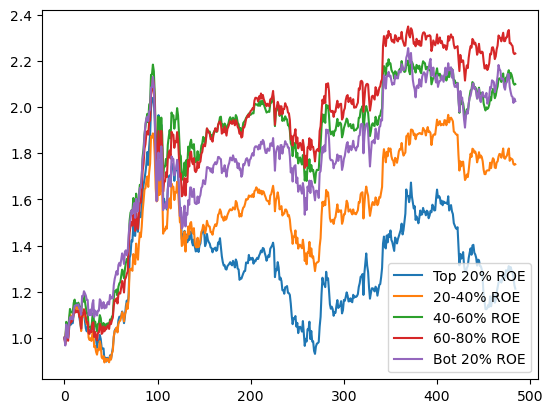

In [16]:
total_return_1 = [1]
total_return_2 = [1]
total_return_3 = [1]
total_return_4 = [1]
total_return_5 = [1]

for j in range(len(factor_matrix[0])):
    factor_list = []
    return_list = []
    delete_elements = []
    for i in range(len(factor_matrix)):
        if return_matrix[i][j] != -100:
            factor_list.append(factor_matrix[i][j])
            return_list.append(return_matrix[i][j])
    
    today_return = total_return_1[-1]
    selected_stock = get_top_20_percent_indices(factor_list)
    for k in selected_stock:
        today_return = today_return + (return_list[k] / len(selected_stock))
    today_return = today_return - 0.0002
    total_return_1.append(today_return)

    today_return = total_return_2[-1]
    selected_stock = get_top_20_to_40_percent_indices(factor_list)
    for k in selected_stock:
        today_return = today_return + (return_list[k] / len(selected_stock))
    today_return = today_return - 0.0002
    total_return_2.append(today_return)

    today_return = total_return_3[-1]
    selected_stock = get_top_40_to_60_percent_indices(factor_list)
    for k in selected_stock:
        today_return = today_return + (return_list[k] / len(selected_stock))
    today_return = today_return - 0.0002
    total_return_3.append(today_return)

    today_return = total_return_4[-1]
    selected_stock = get_top_60_to_80_percent_indices(factor_list)
    for k in selected_stock:
        today_return = today_return + (return_list[k] / len(selected_stock))
    today_return = today_return - 0.0002
    total_return_4.append(today_return)

    today_return = total_return_5[-1]
    selected_stock = get_bottom_20_percent_indices(factor_list)
    for k in selected_stock:
        today_return = today_return + (return_list[k] / len(selected_stock))
    today_return = today_return - 0.0002
    total_return_5.append(today_return)


plt.plot(total_return_1, label='Top 20% ROE')
plt.plot(total_return_2, label='20-40% ROE')
plt.plot(total_return_3, label='40-60% ROE')
plt.plot(total_return_4, label='60-80% ROE')
plt.plot(total_return_5, label='Bot 20% ROE')
plt.legend()
plt.show()


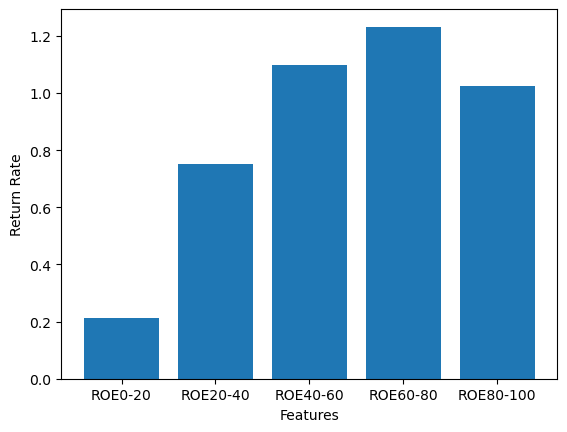

In [17]:
import matplotlib.pyplot as plt

data = [total_return_1[-1]-1, total_return_2[-1]-1, total_return_3[-1]-1, total_return_4[-1]-1, total_return_5[-1]-1]
labels = ['ROE0-20', 'ROE20-40', 'ROE40-60', 'ROE60-80', 'ROE80-100']

plt.bar(range(len(data)), data, tick_label=labels)

# Adding labels and title
plt.xlabel('Features')
plt.ylabel('Return Rate')


# Displaying the histogram
plt.show()
